# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Haikal Irfano
- **Email:** haikalirfano@gmail.com
- **ID Dicoding:** blehblah

## Menentukan Pertanyaan Bisnis

- Seberapa besar pengaruh hari dalam penggunaan sepeda rental?
- Bagaimana perbandingan pengguna biasa dengan terdaftar?
- Apakah terdapat korelasi antara penggunaan sepeda rental dengan suhu?

## Import Semua Packages/Library yang Digunakan

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [169]:
hour_df = pd.read_csv('data\hour.csv', index_col='instant', parse_dates=['dteday'])
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [170]:
day_df = pd.read_csv('data\day.csv', index_col='instant', parse_dates=['dteday'])
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [171]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [172]:
hour_df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [173]:
hour_df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [174]:
print(f"Duplicated data count: {hour_df.duplicated().sum()}")

Duplicated data count: 0


We see no major problems with the data, so we can continue.\
And since the day.csv just takes the average or sums of each column from hour.csv we will just ignore the day.csv.

### Cleaning Data

In [175]:
# rename the columns to be more readable

hour_df.rename(columns={'dteday':'date',
                        'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'holiday':'is_holiday',
                        'workingday':'is_working_day',
                        'weathersit':'weather_situation',
                        'temp':'temperature',
                        'atemp':'feels_like_temperature',
                        'hum':'humidity',
                        'casual':'casual_users',
                        'registered':'registered_users',
                        'cnt':'total_users'}, inplace=True)

In [176]:
# map seasons to be more readable
season_mapping = {1: 'spring', 2: 'summer', 3: 'autumn', 4: 'winter'}

hour_df['season'] = hour_df['season'].map(season_mapping)

In [177]:
# map year to be more readable
year_mapping = {0: 2011, 1: 2012}

hour_df['year'] = hour_df['year'].map(year_mapping)

In [178]:
# map months to be more readable
month_mapping = {1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may',
                    6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october',
                    11: 'november', 12: 'december'}

hour_df['month'] = hour_df['month'].map(month_mapping)

In [179]:
# map days to be more readable
day_mapping = {0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday',
                5: 'friday', 6: 'saturday'}
hour_df['weekday'] = hour_df['weekday'].map(day_mapping)

In [180]:
# change data to be categorical
hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['hour'] = hour_df['hour'].astype('category')
hour_df['is_holiday'] = hour_df['is_holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['is_working_day'] = hour_df['is_working_day'].astype('category')
hour_df['weather_situation'] = hour_df['weather_situation'].astype('category')

In [181]:
# unnormalizing the data
hour_df['temperature'] = hour_df['temperature'] * 41
hour_df['feels_like_temperature'] = hour_df['feels_like_temperature'] * 50

## Exploratory Data Analysis (EDA)

### Explore Hour Data

In [182]:
# user count per season
count_per_season = hour_df.groupby(['season', 'year'])['total_users'].sum().reset_index()
count_per_season.pivot(index='season', columns='year', values='total_users')

year,2011,2012
season,,
autumn,419650,641479
spring,150000,321348
summer,347316,571273
winter,326137,515476


In [183]:
# user count by which day of week
count_per_day = hour_df.groupby(['weekday', 'year'])['total_users'].sum().reset_index()
count_per_day.pivot(index='weekday', columns='year', values='total_users')

year,2011,2012
weekday,,
friday,182006,305784
monday,180221,275282
saturday,179743,298064
sunday,177074,266953
thursday,174552,310843
tuesday,180338,288771
wednesday,169169,303879


In [184]:
# user count by month
count_per_month = hour_df.groupby(['month', 'year'])['total_users'].sum().reset_index()
count_per_month.pivot(index='month', columns='year', values='total_users')

year,2011,2012
month,,
april,94870,174224
august,136691,214503
december,87323,123713
february,48215,103137
january,38189,96744
july,141341,203607
june,143512,202830
march,64045,164875
may,135821,195865


In [185]:
# distribution between registered and casual users
hour_df.groupby(['year'])[['casual_users', 'registered_users', 'total_users']].sum()

,casual_users,registered_users,total_users
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [186]:
# save dataset as csv
hour_df.to_csv('dashboard\hour_modified.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa besar pengaruh hari dalam penggunaan sepeda rental

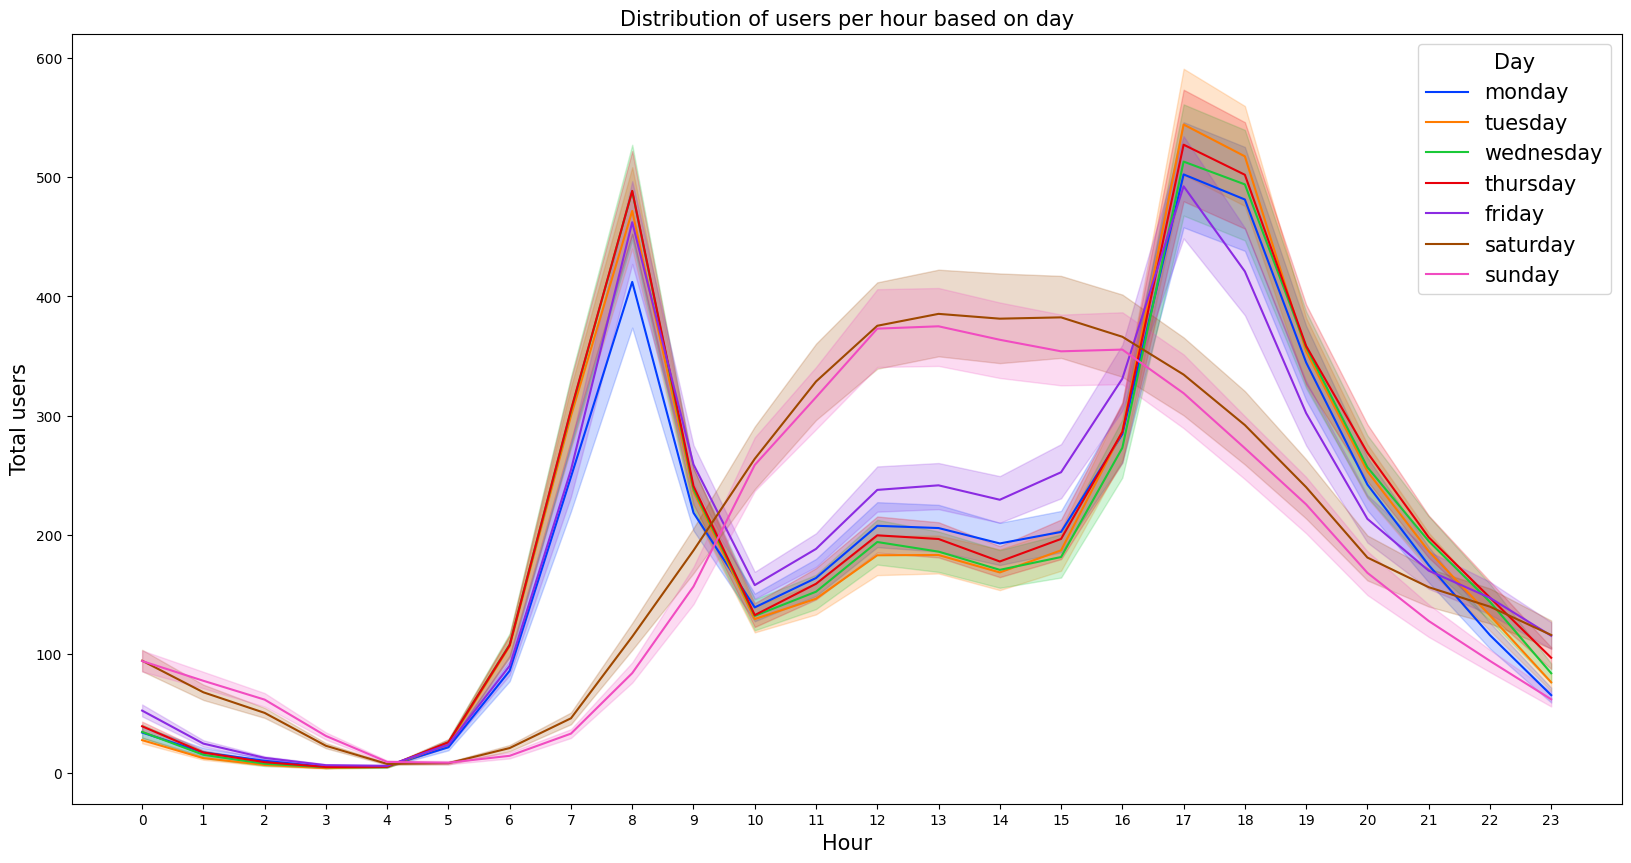

In [187]:
fig, ax = plt.subplots(figsize=(20, 10))
hue_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

sns.lineplot(x='hour', y='total_users', hue='weekday', palette='bright', hue_order=hue_order, data=hour_df)

ax.set_title('Distribution of users per hour based on day', fontsize=15)
ax.set_xlabel('Hour', fontsize=15)
ax.set_xticks(range(0, 24))
ax.set_ylabel('Total users', fontsize=15)
ax.legend(loc='upper right', fontsize=15, title='Day', title_fontsize=15)
plt.show()

### Pertanyaan 2: Bagaimana perbandingan pengguna biasa dengan terdaftar?

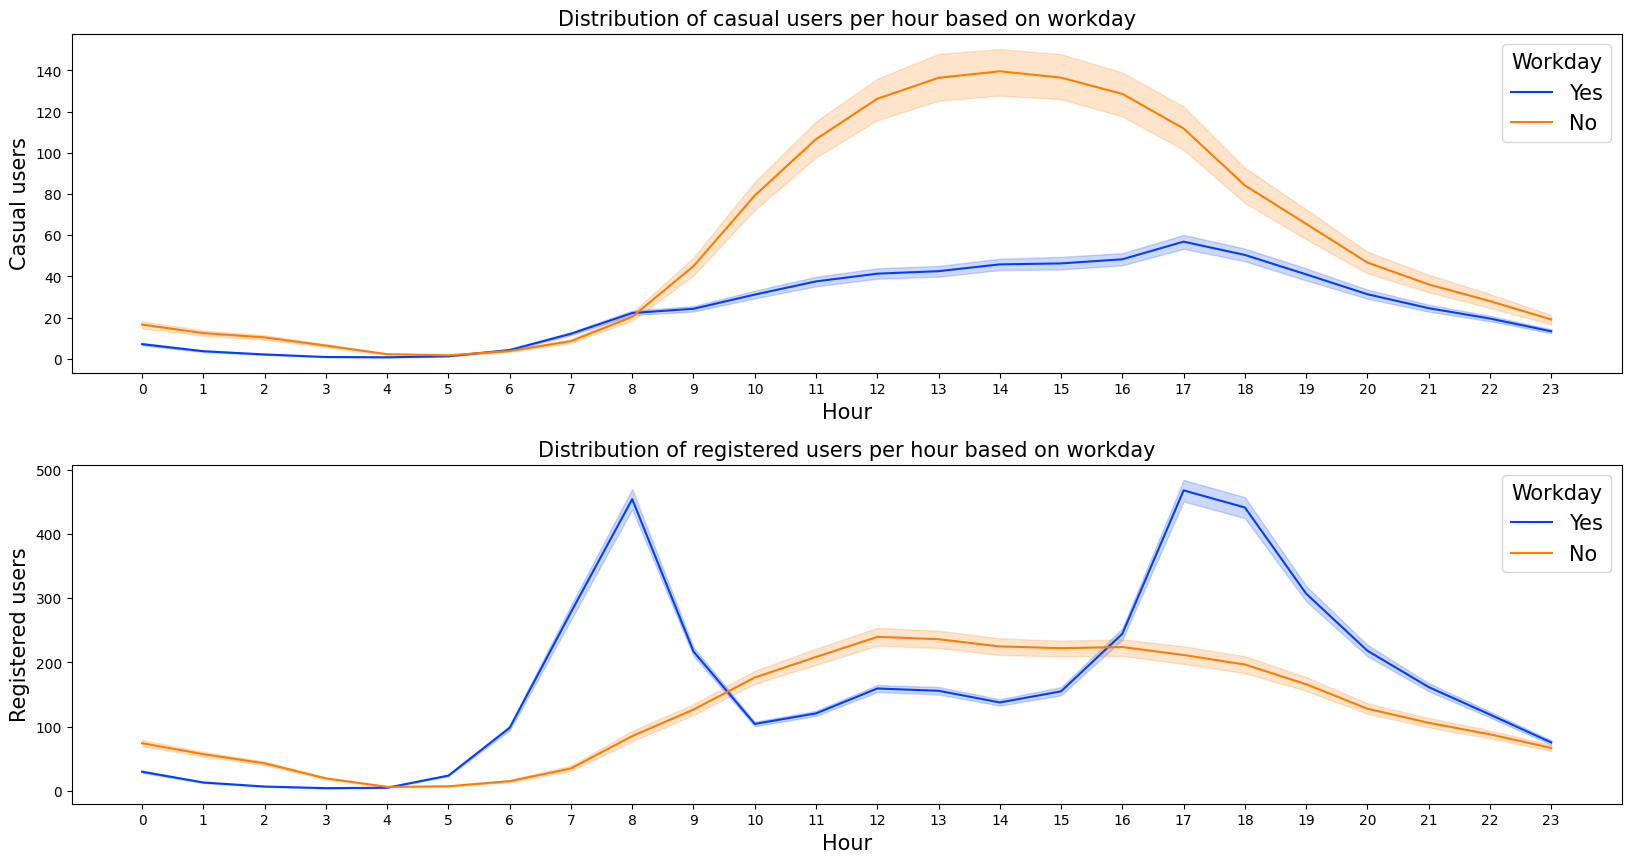

In [188]:
# distribution of casual and registered users per hour by workday
fig, (ax1, ax2) = plt.subplots(figsize=(20, 10), nrows=2)
hue_order = [1, 0]

sns.lineplot(x='hour', y='casual_users', hue='is_working_day', hue_order=hue_order, palette='bright', data=hour_df, ax=ax1)
sns.lineplot(x='hour', y='registered_users', hue='is_working_day', hue_order=hue_order, palette='bright', data=hour_df, ax=ax2)

ax1.set_title('Distribution of casual users per hour based on workday', fontsize=15)
ax1.set_xlabel('Hour', fontsize=15)
ax1.set_xticks(range(0, 24))
ax1.set_ylabel('Casual users', fontsize=15)
ax1.legend(loc='upper right', fontsize=15, title='Workday', title_fontsize=15, labels=['Yes', 'No'], handles=ax1.lines[::len(hue_order)+1])

ax2.set_title('Distribution of registered users per hour based on workday', fontsize=15)
ax2.set_xlabel('Hour', fontsize=15)
ax2.set_xticks(range(0, 24))
ax2.set_ylabel('Registered users', fontsize=15)
ax2.legend(loc='upper right', fontsize=15, title='Workday', title_fontsize=15, labels=['Yes', 'No'], handles=ax2.lines[::len(hue_order)+1])

plt.subplots_adjust(hspace=0.27)
plt.show()

### Pertanyaan 3: Apakah terdapat korelasi antara penggunaan sepeda rental dengan suhu?

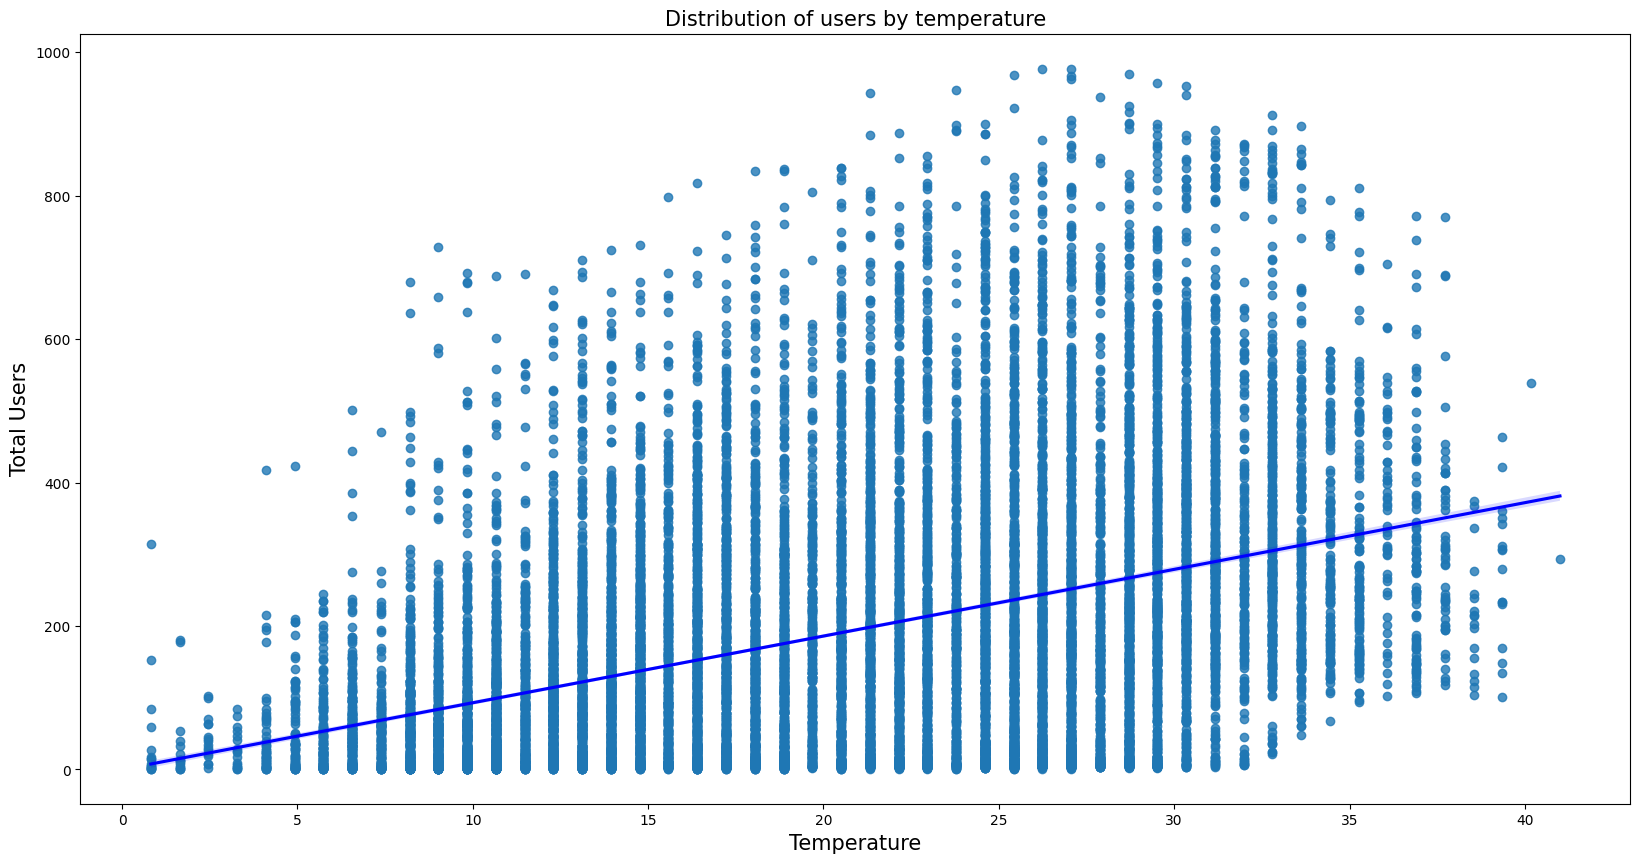

In [189]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.regplot(x='temperature', y='total_users', line_kws=dict(color="b"), data=hour_df)

ax.set_title('Distribution of users by temperature', fontsize=15)
ax.set_xlabel('Temperature', fontsize=15)
ax.set_ylabel('Total Users', fontsize=15)
plt.show()

## Conclusion

- Seberapa besar pengaruh hari dalam penggunaan sepeda rental?\
Penggunaan sepeda rental dari jamnya sangat berhubungan dengan hari. Dapat dilihat bahwa penggunaan sepeda pada hari kerja atau senin sampai jumat sangat berbeda dengan penggunaan sepeda rental pada hari libur atau sabtu dan minggu.\
Penggunaan sepeda rental pada hari kerja memuncak pada pukul 7-8 pagi dan 5-6 malam, hal ini dikarenakan pengguna sepeda rental yang menggunakannya untuk pulang pergi kerja, terbalik dengan hari libur dimana penggunaan memuncak pada pukul 1-3.
- Bagaimana perbandingan pengguna biasa dengan terdaftar?\
Pengguna sepeda rental biasa dengan terdaftar memiliki puncak yang sangat berbeda, hal ini dikarenakan pengguna biasa menggunakan sepedanya untuk kegiatan rekreasi pada hari libur, dimana pengguna terdaftar menggunakan sepedanya untuk pulang pergi kerja.
- Apakah terdapat korelasi antara penggunaan sepeda rental dengan suhu?\
Terdapat korelasi antara penggunaan sepeda rental dengan suhu, hal ini dapat dilihat dengan garis regresi yang menunjukan peningkatan linear antara temperatur dengan penggunaan sepeda rental.